**Installing and Importing needed Libraries**

In [ ]:
! pip install tensorflow==2.10.0  # Or the latest compatible version
! pip install keras==2.10.0       # Or the latest compatible version
! pip install --upgrade segmentation-models
! pip install git+https://github.com/qubvel/segmentation_models


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.0/578.0 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 42.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 39.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 60.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 63.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 34.8 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tensorboard-data-server-0.7.2
  At

  Attempting uninstall: image-classifiers
    Found existing installation: image-classifiers 0.2.0
    Uninstalling image-classifiers-0.2.0:
      Successfully uninstalled image-classifiers-0.2.0
  Attempting uninstall: segmentation-models
    Found existing installation: segmentation-models 0.2.1
    Uninstalling segmentation-models-0.2.1:
      Successfully uninstalled segmentation-models-0.2.1
  Cloning https://github.com/qubvel/segmentation_models to /tmp/pip-req-build-nkorhbpq
  Running command git clone --filter=blob:none --quiet https://github.com/qubvel/segmentation_models /tmp/pip-req-build-nkorhbpq
  Resolved https://github.com/qubvel/segmentation_models to commit 5d24bbfb28af6134e25e2c0b79e7727f6c0491d0
  Running command git submodule update --init --recursive -q
  Preparing metadata (setup.py) ... done
  Attempting uninstall: efficientnet
    Found existing installation: efficientnet 1.0.0
    Uninstalling efficientnet-1.0.0:
      Successfully uninstalled efficientnet-1.0.

In [ ]:
! pip install -U segmentation-models==0.2.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 4.5 MB/s eta 0:00:00


In [ ]:
! pip install tifffile


In [ ]:
! pip install GDAL

In [ ]:
! pip install tensorflow

In [ ]:
from google.colab import drive
drive.mount('/content/drive' , force_remount= True)

Mounted at /content/drive


In [ ]:
import os
import tifffile as tiff
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose, concatenate, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score
import tensorflow_hub as hub
from tensorflow.keras.layers import Input, Conv2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
import seaborn as sns
from tensorflow.keras.utils import normalize
import tensorflow as tf
import os
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam
import glob
import imgaug.augmenters as iaa
from sklearn.model_selection import train_test_split
from tensorflow.keras.metrics import MeanIoU
import random
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
from tensorflow.keras.optimizers import Adam
from keras.layers import Activation, MaxPool2D, Concatenate, AveragePooling2D
from keras.models import load_model
from tensorflow.keras.applications import ResNet50
from zipfile import ZipFile
import numpy as np
import tensorflow as tf
import segmentation_models as sm
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input




---



**Reading Input Images and Labels**

In [ ]:

# Directory containing the .tif images
image_dir = "/content/drive/MyDrive/data/images"

# List to store the images
images = []

# Read all .tif images in the directory
for filename in sorted(os.listdir(image_dir)):
    if filename.endswith(".tif"):
        image_path = os.path.join(image_dir, filename)
        image = tiff.imread(image_path)
        images.append(image)
        print(f"Loaded {filename} with shape {image.shape}")

# Convert to numpy array for further processing if needed
images_array = np.stack(images, axis=0)
print(f"All images stacked with shape: {images_array.shape}")

In [ ]:
images_array[0]

In [ ]:
images_array[0].shape

(128, 128, 12)

In [ ]:
def min_max_scaling(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))

# Assuming your array is named images_array with shape (306, 128, 128, 12)
normalized_images_array = min_max_scaling(images_array)

In [ ]:
normalized_images_array.shape

(306, 128, 128, 12)

In [ ]:
normalized_images_array[0]

**Trying to extract RGB channels and plot them**

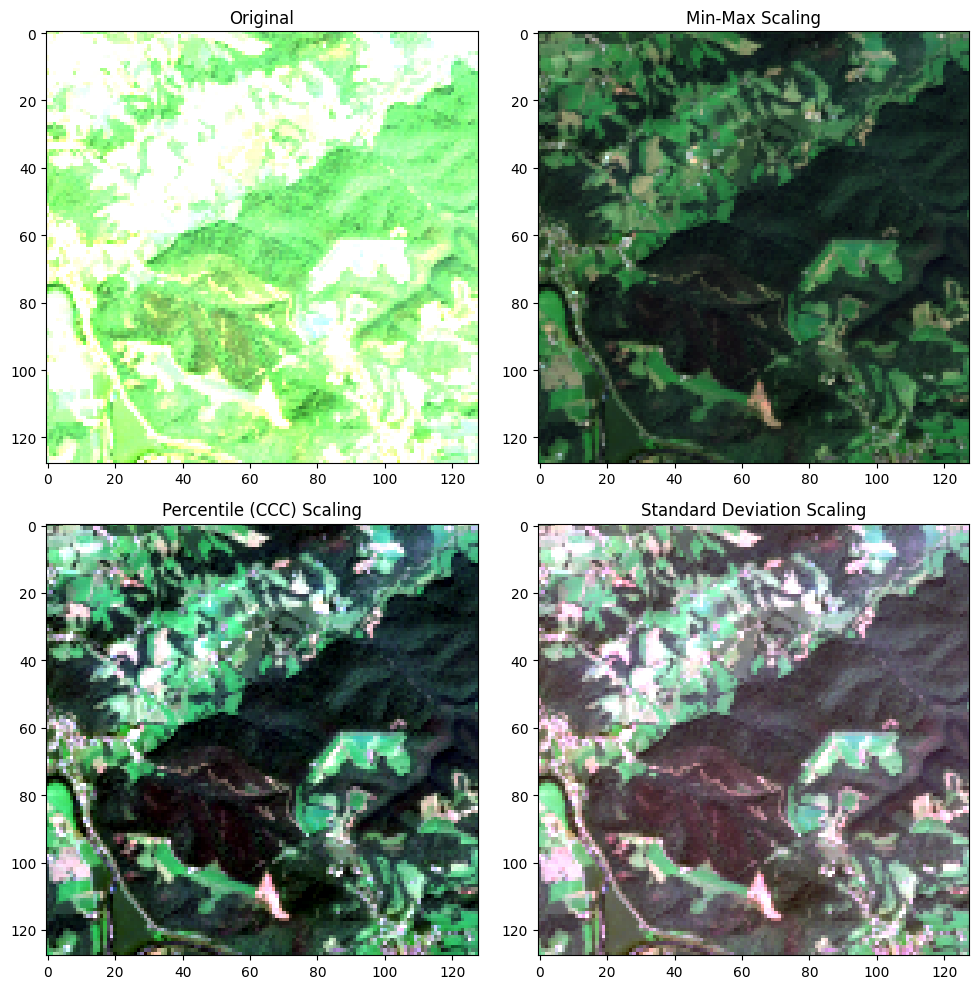

In [ ]:
def scaleCCC(x):
    return((x - np.nanpercentile(x, 2))/(np.nanpercentile(x, 98) - np.nanpercentile(x,2)))

def scaleStd(x):
    return((x - (np.nanmean(x)-np.nanstd(x)*2))/((np.nanmean(x)+np.nanstd(x)*2) - (np.nanmean(x)-np.nanstd(x)*2)))

def scaleMinMax(x):
    return((x - np.nanmin(x))/(np.nanmax(x) - np.nanmin(x)))

# Load the image using GDAL
ds = gdal.Open("/content/drive/MyDrive/data/images/1.tif")

# Extract the RGB channels
r = ds.GetRasterBand(4).ReadAsArray()
g = ds.GetRasterBand(3).ReadAsArray()
b = ds.GetRasterBand(2).ReadAsArray()

ds = None  # Close the dataset

# Apply the scaling functions
rMinMax = scaleMinMax(r)
gMinMax = scaleMinMax(g)
bMinMax = scaleMinMax(b)

rCCC = scaleCCC(r)
gCCC = scaleCCC(g)
bCCC = scaleCCC(b)

rStd = scaleStd(r)
gStd = scaleStd(g)
bStd = scaleStd(b)

# Stack the channels to form RGB images
rgbMinMax = np.dstack((rMinMax, gMinMax, bMinMax))
rgbCCC = np.dstack((rCCC, gCCC, bCCC))
rgbStd = np.dstack((rStd, gStd, bStd))

# Plotting the images in a 2x2 grid
plt.figure(figsize=(10, 10))

# Original image without scaling
plt.subplot(2, 2, 1)
plt.imshow(np.dstack((r, g, b)))
plt.title('Original')

# Min-Max Scaling
plt.subplot(2, 2, 2)
plt.imshow(rgbMinMax)
plt.title('Min-Max Scaling')

# Percentile (CCC) Scaling
plt.subplot(2, 2, 3)
plt.imshow(rgbCCC)
plt.title('Percentile (CCC) Scaling')

# Standard Deviation Scaling
plt.subplot(2, 2, 4)
plt.imshow(rgbStd)
plt.title('Standard Deviation Scaling')

# Adjust layout
plt.tight_layout()
plt.show()


All images stacked with shape: (306, 128, 128, 12)

In [ ]:


# Directory containing the .png label images
label_dir = "/content/drive/MyDrive/data/labels"

# List to store the label images
labels = []

# Read all .png label images in the directory
for filename in sorted(os.listdir(label_dir)):
    if filename.endswith(".png"):
        #Remove next line if we wanted to get all 406 -->
        if( '_' in filename.split('.')[0] ): continue
        label_path = os.path.join(label_dir, filename)
        label_image = Image.open(label_path)
        label_array = np.array(label_image)
        labels.append(label_array)
        print(f"Loaded {filename} with shape {label_array.shape}")

# Convert to numpy array for further processing if needed
labels_array = np.stack(labels, axis=0)
print(f"All labels stacked with shape: {labels_array.shape}")

Labels --> All labels stacked with shape: (456, 128, 128)

---





In [ ]:
# ANa kda rmet el 150 image el zyada
labels_array.shape
# De Kolha zeros w ones --> Tbe3y ma da el op bta3k
1# 3ayzeen n3ml normalisation ll input

1



---



In [ ]:
data = list(zip(normalized_images_array, labels_array))

# Step 2: Shuffle the data
np.random.shuffle(data)

# Step 3: Unzip the data back into inputs and labels (shuffled)
inputs, labels = zip(*data)
inputs = np.array(inputs)
labels = np.array(labels)

# Step 4: Split the data into training, validation, and testing sets
# 70% Training, 15% Validation, 15% Testing
train_inputs, temp_inputs, train_labels, temp_labels = train_test_split(inputs, labels, test_size=0.2, random_state=42)
val_inputs, test_inputs, val_labels, test_labels = train_test_split(temp_inputs, temp_labels, test_size=0.5, random_state=42)

# Step 5: Check the shapes of the resulting datasets
print(f"Training set: {train_inputs.shape}, {train_labels.shape}")
print(f"Validation set: {val_inputs.shape}, {val_labels.shape}")
print(f"Test set: {test_inputs.shape}, {test_labels.shape}")

Training set: (244, 128, 128, 12), (244, 128, 128)
Validation set: (31, 128, 128, 12), (31, 128, 128)
Test set: (31, 128, 128, 12), (31, 128, 128)


In [ ]:
# Step 1: Convert the data into TensorFlow Datasets
train_ds = tf.data.Dataset.from_tensor_slices((train_inputs, train_labels)).batch(32)
val_ds = tf.data.Dataset.from_tensor_slices((val_inputs, val_labels)).batch(32)
test_ds = tf.data.Dataset.from_tensor_slices((test_inputs, test_labels)).batch(32)



---



**Building Model**

UNET MODEL ARCH

In [ ]:
sm.set_framework('tf.keras')  # Choose TensorFlow Keras as the backend

# Define constants
BACKBONE = 'resnet34'
INPUT_SHAPE = (128, 128, 12)  # Adjust as needed
CLASSES = 1  # Binary segmentation
BATCH_SIZE = 16
EPOCHS = 50

# Get preprocessing function
preprocess_input = sm.get_preprocessing(BACKBONE)

# Define the U-Net model
# Define the U-Net model without pre-trained weights
model = sm.Unet(BACKBONE, input_shape=(128, 128, 12), encoder_weights=None)

# Compile the model
model.compile(
    optimizer='Adam',
    loss=sm.losses.bce_jaccard_loss,
    metrics=[sm.metrics.iou_score]
)
train_inputs = preprocess_input(train_inputs)
val_inputs = preprocess_input(val_inputs)
train_labels=preprocess_input(train_labels)
val_labels=preprocess_input(val_labels)

# Fit the model
history = model.fit(
   x=train_inputs.astype(np.float32),
   y=train_labels.astype(np.float32),
  #  batch_size=16,
   epochs=100,
   validation_data=(val_inputs.astype(np.float32),val_labels.astype(np.float32)),
)

# Save the model if needed
# model.save('unet_dice_model.h5')


Epoch 1/100
8/8 [==============================] - 97s 11s/step - loss: 1.2190 - iou_score: 0.3277 - val_loss: 5.3754 - val_iou_score: 0.0510
Epoch 2/100
8/8 [==============================] - 85s 11s/step - loss: 0.9069 - iou_score: 0.4454 - val_loss: 5.2023 - val_iou_score: 0.0229
Epoch 3/100
8/8 [==============================] - 92s 11s/step - loss: 0.8197 - iou_score: 0.4908 - val_loss: 5.3665 - val_iou_score: 0.0432
Epoch 4/100
8/8 [==============================] - 85s 11s/step - loss: 0.7631 - iou_score: 0.5199 - val_loss: 10.6385 - val_iou_score: 0.2602
Epoch 5/100
8/8 [==============================] - 88s 11s/step - loss: 0.7387 - iou_score: 0.5395 - val_loss: 5.1198 - val_iou_score: 0.0082
Epoch 6/100
8/8 [==============================] - 92s 12s/step - loss: 0.6529 - iou_score: 0.5824 - val_loss: 5.4251 - val_iou_score: 0.0502
Epoch 7/100
8/8 [==============================] - 86s 11s/step - loss: 0.6386 - iou_score: 0.6042 - val_loss: 5.0949 - val_iou_score: 1.3227e-10
E



---



**Metrics on Test Data**

In [ ]:
# Make predictions on test data
test_predictions = model.predict(test_inputs.astype(np.float32))
test_predictions_binary = (test_predictions > 0.5).astype(np.uint8)  # Convert to binary if using sigmoid activation

# Flatten arrays for metrics calculation
test_labels_flat = test_labels.flatten()
test_predictions_binary_flat = test_predictions_binary.flatten()

# Compute metrics
accuracy = np.mean(test_labels_flat == test_predictions_binary_flat)
iou_score = sm.metrics.iou_score(test_labels_flat, test_predictions_binary_flat)  # Compute IoU score

print(f'Accuracy: {accuracy:.4f}')
print(f'IoU Score: {iou_score:.4f}')


In [ ]:
test_labels_flat = test_labels.flatten()
test_predictions_binary_flat = test_predictions_binary.flatten()

# Compute metrics
conf_matrix = confusion_matrix(test_labels_flat, test_predictions_binary_flat)
f1 = f1_score(test_labels_flat, test_predictions_binary_flat)
precision = precision_score(test_labels_flat, test_predictions_binary_flat)
recall = recall_score(test_labels_flat, test_predictions_binary_flat)

print(f'F1 Score: {f1:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

# Plot Confusion Matrix
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['Background', 'Foreground'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Compute Accuracy and IoU Score
accuracy = np.mean(test_labels_flat == test_predictions_binary_flat)
iou_score = sm.metrics.iou_score(test_labels_flat, test_predictions_binary_flat)  # Compute IoU score

print(f'Accuracy: {accuracy:.4f}')
print(f'IoU Score: {iou_score:.4f}')



---

